In [1]:
from scipy import stats


In [2]:
srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc[0]

-0.3369615411989142

In [3]:
from skimage import metrics
from skimage.io import imread
import cv2

# Load two images
def get_ssim(addr , addr_ref):
    img = imread(addr)
    ref = imread(addr_ref)

    # Compute SSIM between two images
    return metrics.structural_similarity(img, ref, multichannel=True)

In [4]:
%cd ..


c:\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [5]:
import predict_one_image

from haarpsi.haarPsi import haar_psi

In [6]:
iqa = predict_one_image.IQA_CKDN()

In [7]:
iqa.predict(restored_addr="images1/restored/3.png" , degraded_addr= "images1/degraded/3.png")

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


0.3415382

In [8]:
def compute_haarpsi(im_addr , ref_addr):
    im = cv2.imread(im_addr)
    ref = cv2.imread(ref_addr)
    return haar_psi(im , ref)[0]

In [9]:
compute_haarpsi("images1/restored/3.png" , "images1/degraded/3.png")

0.28236600275638674

In [10]:
TID_ADDR = "C:\OTHER\\term2\seminars\papers\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\datasets\TID2013"

In [11]:
import glob

In [21]:
def get_srocc_plcc(rest , deg , dmos , return_preds = False):
    preds = []
    gt = []
    for i in range(len(deg)):
        pred = iqa.predict(restored_addr = rest[i] , degraded_addr= deg[i])
        preds.append(pred)

    # print("rest , deg = " , len(rest) , len(deg))
    # print("pred , dmos = " , len(preds) , len(dmos))
    plcc = stats.pearsonr(preds, dmos)
    srcc = stats.spearmanr(preds, dmos)
    if return_preds:
        return srcc , plcc , preds
    return srcc , plcc 

In [22]:
def get_srocc_plcc_SSIM(rest , deg , dmos , return_preds = False):
    preds = []
    gt = []
    for i in range(len(deg)):
        pred = get_ssim(rest[i] ,  deg[i]) 
        preds.append(pred)

    # print("rest , deg = " , len(rest) , len(deg))
    # print("pred , dmos = " , len(preds) , len(dmos))
    plcc = stats.pearsonr(preds, dmos)
    srcc = stats.spearmanr(preds, dmos)
    if return_preds:
        return srcc , plcc , preds
    return srcc , plcc

In [23]:
def get_srocc_plcc_HaarPsi(rest , deg , dmos , return_preds = False):
    preds = []
    gt = []
    for i in range(len(deg)):
        pred = compute_haarpsi(rest[i] ,  deg[i]) 
        preds.append(pred)

    # print("rest , deg = " , len(rest) , len(deg))
    # print("pred , dmos = " , len(preds) , len(dmos))
    plcc = stats.pearsonr(preds, dmos)
    srcc = stats.spearmanr(preds, dmos)
    if return_preds:
        return srcc , plcc , preds
    return srcc , plcc

In [15]:
def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos

In [16]:
def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos

In [17]:

def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

In [18]:
refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)




## CKDN_content

In [19]:
contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]

In [43]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('CKDN_content.xlsx')
worksheet = workbook.add_worksheet()


In [44]:
row = 3
for i in contents:
        print("row , col = " , row-2)
        rest = get_images_content(i)
        deg = get_refs_content(i)
        dmos = get_mos_content(i)
        # print("ewewew" , len(deg))
        srcc , plcc = get_srocc_plcc(rest , deg , dmos)

        worksheet.write(row, 4, i)
        worksheet.write(270+row, 4, i)

        worksheet.write(row, 5, str(srcc[0]))
        worksheet.write(270+row, 5, str(plcc[0]))
        row += 1

workbook.close()

row , col =  1
row , col =  2
row , col =  3
row , col =  4
row , col =  5
row , col =  6
row , col =  7
row , col =  8
row , col =  9
row , col =  10
row , col =  11
row , col =  12
row , col =  13
row , col =  14
row , col =  15
row , col =  16
row , col =  17
row , col =  18
row , col =  19
row , col =  20
row , col =  21
row , col =  22
row , col =  23
row , col =  24
row , col =  25


In [26]:
get_images_content("13")[:3]


['C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\I13_01_1.bmp',
 'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i13_01_2.bmp',
 'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i13_01_3.bmp']

im_content:  12 srocc:  0.8484137133713711


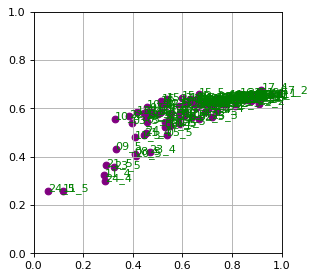

In [31]:
from turtle import color
import numpy as np
from matplotlib import pyplot as plt

iii = "12"

rest = get_images_content(iii)
deg = get_refs_content(iii)
dmos = get_mos_content(iii)

srcc , plcc , preds = get_srocc_plcc(rest , deg , dmos , return_preds=True)

dmoss = np.array(dmos) / max(dmos)

fig, ax = plt.subplots(figsize=(4,4), dpi=80)
ax.scatter(dmoss, preds,color="purple")



plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

for i, txt in enumerate(rest):
        ax.annotate(txt.split("\\")[-1].split(".")[0][4:], (dmoss[i] , preds[i]),color="green")

print("im_content: " , iii , "srocc: " , srcc[0])

## SSIM_content

In [53]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('SSIM_content.xlsx')
worksheet = workbook.add_worksheet()

In [54]:
row = 3
for i in contents:
        print("row , col = " , row-2)
        rest = get_images_content(i)
        deg = get_refs_content(i)
        dmos = get_mos_content(i)
        # print("ewewew" , len(deg))
        srcc , plcc = get_srocc_plcc_SSIM(rest , deg , dmos)

        worksheet.write(row, 4, i)
        worksheet.write(270+row, 4, i)

        worksheet.write(row, 5, str(srcc[0]))
        worksheet.write(270+row, 5, str(plcc[0]))
        row += 1

workbook.close()

row , col =  1


C:\Users\Farhad\AppData\Local\Temp\ipykernel_16900\1341804016.py:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return metrics.structural_similarity(img, ref, multichannel=True)


row , col =  2
row , col =  3
row , col =  4
row , col =  5
row , col =  6
row , col =  7
row , col =  8
row , col =  9
row , col =  10
row , col =  11
row , col =  12
row , col =  13
row , col =  14
row , col =  15
row , col =  16
row , col =  17
row , col =  18
row , col =  19
row , col =  20
row , col =  21
row , col =  22
row , col =  23
row , col =  24
row , col =  25


C:\Users\Farhad\AppData\Local\Temp\ipykernel_5008\3854676794.py:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return metrics.structural_similarity(img, ref, multichannel=True)


im_content: 06  srocc: 0.640230859540211


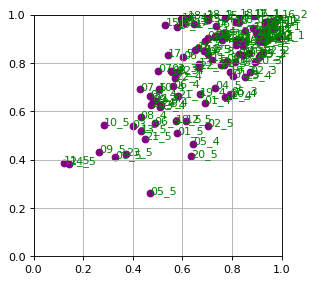

In [35]:
from turtle import color
import numpy as np
from matplotlib import pyplot as plt

iii = "06"

rest = get_images_content(iii)
deg = get_refs_content(iii)
dmos = get_mos_content(iii)

srcc , plcc , preds = get_srocc_plcc_SSIM(rest , deg , dmos , return_preds=True)

dmoss = np.array(dmos) / max(dmos)

fig, ax = plt.subplots(figsize=(4,4), dpi=80)
ax.scatter(dmoss, preds,color="purple")



plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

for i, txt in enumerate(rest):
        ax.annotate(txt.split("\\")[-1].split(".")[0][4:], (dmoss[i] , preds[i]),color="green")

print("im_content:" , iii , " srocc:" , srcc[0])

## CKDN_dist

In [59]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('CKDN_dist.xlsx')
worksheet = workbook.add_worksheet()

In [60]:
row = 3
for i in dsts:
        print("row , col = " , row-2)
        rest = get_images_dst(i)
        deg = refs_for_dst
        dmos = get_mos_dst(i)
        # print("ewewew" , len(deg))
        srcc , plcc = get_srocc_plcc(rest , deg , dmos)

        worksheet.write(row, 4, i)
        worksheet.write(270+row, 4, i)

        worksheet.write(row, 5, str(srcc[0]))
        worksheet.write(270+row, 5, str(plcc[0]))
        row += 1

workbook.close()

row , col =  1
row , col =  2
row , col =  3
row , col =  4
row , col =  5
row , col =  6
row , col =  7
row , col =  8
row , col =  9
row , col =  10
row , col =  11
row , col =  12
row , col =  13
row , col =  14
row , col =  15
row , col =  16
row , col =  17
row , col =  18
row , col =  19
row , col =  20
row , col =  21
row , col =  22
row , col =  23
row , col =  24


im_content: 24  srocc: 0.852101782680914


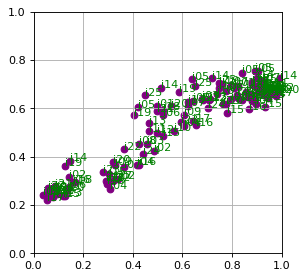

In [65]:
from turtle import color
import numpy as np
from matplotlib import pyplot as plt

iii = "24"

rest = get_images_dst(iii)
deg = refs_for_dst
dmos = get_mos_dst(iii)

srcc , plcc , preds = get_srocc_plcc(rest , deg , dmos , return_preds=True)

dmoss = np.array(dmos) / max(dmos)

fig, ax = plt.subplots(figsize=(4,4), dpi=80)
ax.scatter(dmoss, preds,color="purple")



plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

for i, txt in enumerate(rest):
        ax.annotate(txt.split("\\")[-1].split(".")[0][:3], (dmoss[i] , preds[i]),color="green")

print("im_content:" , iii , " srocc:" , srcc[0])

## SSIM_dist

In [64]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('ss_dist.xlsx')
worksheet = workbook.add_worksheet()

In [65]:
row = 3
for i in dsts:
        print("row , col = " , row-2)
        rest = get_images_dst(i)
        deg = refs_for_dst
        dmos = get_mos_dst(i)
        # print("ewewew" , len(deg))
        srcc , plcc = get_srocc_plcc_SSIM(rest , deg , dmos)

        worksheet.write(row, 4, i)
        worksheet.write(270+row, 4, i)

        worksheet.write(row, 5, str(srcc[0]))
        worksheet.write(270+row, 5, str(plcc[0]))
        row += 1

workbook.close()

row , col =  1
row , col =  2
row , col =  3
row , col =  4
row , col =  5
row , col =  6
row , col =  7
row , col =  8
row , col =  9
row , col =  10
row , col =  11
row , col =  12
row , col =  13
row , col =  14
row , col =  15
row , col =  16
row , col =  17
row , col =  18
row , col =  19
row , col =  20
row , col =  21
row , col =  22
row , col =  23
row , col =  24


C:\Users\Farhad\AppData\Local\Temp\ipykernel_5008\3854676794.py:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return metrics.structural_similarity(img, ref, multichannel=True)


im_content: 11  srocc: 0.9245905870490109


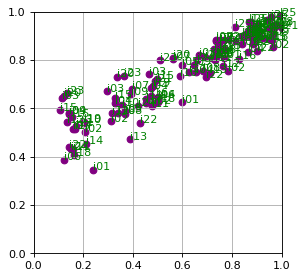

In [61]:
from turtle import color
import numpy as np
from matplotlib import pyplot as plt

iii = "11"

rest = get_images_dst(iii)
deg = refs_for_dst
dmos = get_mos_dst(iii)

srcc , plcc , preds = get_srocc_plcc_SSIM(rest , deg , dmos , return_preds=True)

dmoss = np.array(dmos) / max(dmos)

fig, ax = plt.subplots(figsize=(4,4), dpi=80)
ax.scatter(dmoss, preds,color="purple")



plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

for i, txt in enumerate(rest):
        ax.annotate(txt.split("\\")[-1].split(".")[0][:3], (dmoss[i] , preds[i]),color="green")

print("im_content:" , iii , " srocc:" , srcc[0])

## Haar_content

In [23]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('Haar_content.xlsx')
worksheet = workbook.add_worksheet()

In [24]:
row = 3
for i in contents:
        print("row , col = " , row-2)
        rest = get_images_content(i)
        deg = get_refs_content(i)
        dmos = get_mos_content(i)
        # print("ewewew" , len(rest))
        srcc , plcc = get_srocc_plcc_HaarPsi(rest , deg , dmos)

        worksheet.write(row, 4, i)
        worksheet.write(270+row, 4, i)

        worksheet.write(row, 5, str(srcc[0]))
        worksheet.write(270+row, 5, str(plcc[0]))
        row += 1

workbook.close()

row , col =  1
row , col =  2
row , col =  3
row , col =  4
row , col =  5
row , col =  6
row , col =  7
row , col =  8
row , col =  9
row , col =  10
row , col =  11
row , col =  12
row , col =  13
row , col =  14
row , col =  15
row , col =  16
row , col =  17
row , col =  18
row , col =  19
row , col =  20
row , col =  21
row , col =  22
row , col =  23
row , col =  24
row , col =  25


im_content: 04  srocc: 0.9355656992796046


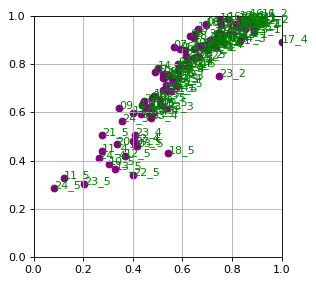

In [50]:
from turtle import color
import numpy as np
from matplotlib import pyplot as plt

iii = "04"

rest = get_images_content(iii)
deg = get_refs_content(iii)
dmos = get_mos_content(iii)

srcc , plcc , preds = get_srocc_plcc_HaarPsi(rest , deg , dmos , return_preds=True)

dmoss = np.array(dmos) / max(dmos)

fig, ax = plt.subplots(figsize=(4,4), dpi=80)
ax.scatter(dmoss, preds,color="purple")



plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

for i, txt in enumerate(rest):
        ax.annotate(txt.split("\\")[-1].split(".")[0][4:], (dmoss[i] , preds[i]),color="green")

print("im_content:" , iii , " srocc:" , srcc[0])

## Haar_dist

In [25]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('Haar_dst.xlsx')
worksheet = workbook.add_worksheet()

In [26]:
row = 3
for i in dsts:
        print("row , col = " , row-2)
        rest = get_images_dst(i)
        deg = refs_for_dst
        dmos = get_mos_dst(i)
        # print("ewewew" , len(rest))
        srcc , plcc = get_srocc_plcc_HaarPsi(rest , deg , dmos)

        worksheet.write(row, 4, i)
        worksheet.write(270+row, 4, i)

        worksheet.write(row, 5, str(srcc[0]))
        worksheet.write(270+row, 5, str(plcc[0]))
        row += 1

workbook.close()

row , col =  1
row , col =  2
row , col =  3
row , col =  4
row , col =  5
row , col =  6
row , col =  7
row , col =  8
row , col =  9
row , col =  10
row , col =  11
row , col =  12
row , col =  13
row , col =  14
row , col =  15
row , col =  16
row , col =  17
row , col =  18
row , col =  19
row , col =  20
row , col =  21
row , col =  22
row , col =  23
row , col =  24


im_content: 21  srocc: 0.9614340050912391


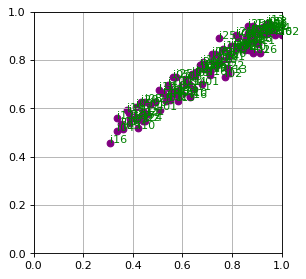

In [55]:
from turtle import color
import numpy as np
from matplotlib import pyplot as plt

iii = "21"

rest = get_images_dst(iii)
deg = refs_for_dst
dmos = get_mos_dst(iii)

srcc , plcc , preds = get_srocc_plcc_HaarPsi(rest , deg , dmos , return_preds=True)

dmoss = np.array(dmos) / max(dmos)

fig, ax = plt.subplots(figsize=(4,4), dpi=80)
ax.scatter(dmoss, preds,color="purple")



plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

for i, txt in enumerate(rest):
        ax.annotate(txt.split("\\")[-1].split(".")[0][:3], (dmoss[i] , preds[i]),color="green")

print("im_content:" , iii , " srocc:" , srcc[0])